# Pure pursuit controller

This notebook shows basic geometrical calculations needed for a pure pursuit controller.

An excellent explanation can be found on [TheNatureOfCode](https://natureofcode.com/book/chapter-6-autonomous-agents/#chapter06_section8)

<img src="https://natureofcode.com/book/imgs/chapter06/ch06_24.png" alt="Drawing" style="width: 600px;"/>

An interactive geometric model below is avaliable on [GeoGebra](https://www.geogebra.org/calculator/vh5d7jvy)

<img src='pure_pursuit.png' width=600px>



In [1]:

from PythonRobotics.vectors import Vector
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,8)

# support functions

def plot_point(xy, txt = None, style = 'o'):
    plt.plot(xy[0], xy[1],  style) 
    if txt is not None:
        plt.text(xy[0]+0.1,xy[1], txt)
        
def plot_path(points, style = 'o-'):
    x = [pt[0] for pt in points]
    y = [pt[1] for pt in points]
    plt.plot(x,y, style)
    
def plot_vector(p1,p2):
    plt.quiver(p1.x,p1.y,(p2-p1).x,(p2-p1).y,angles='xy', scale_units='xy', scale=1)
    
def point_on_line(a: Vector,b: Vector,p: Vector):
    """
    project point p to line defined by a and b
    """
    ap = p - a
    ab = b - a
    return a + ap.dot(ab) / ab.dot(ab) * ab

Heading error = 1.315 rad
Point E: (x=2.000, y=1.000)


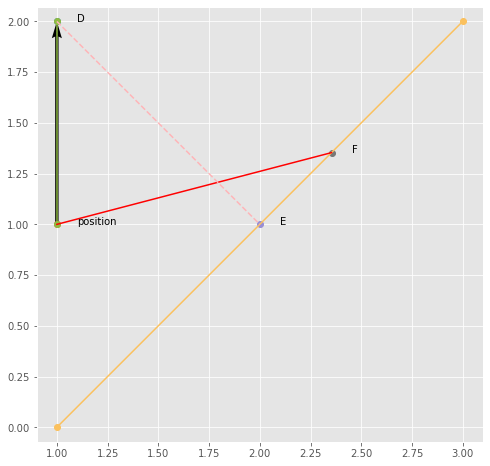

In [2]:
# reproduce geogebra setup

look_ahead = 0.5 # [m]
phi = np.pi/2# robot pose [rad]

a = Vector(1,0)
b = Vector(3,2)
pos = Vector(1,1)
v = Vector.from_polar(1,phi)

d = pos + v # future position
e = point_on_line(a,b,d) # project onto path
f = look_ahead*(b - a)/abs(b -a) + e

# calculate heading error
alpha = v.angle(f-pos)
print('Heading error = %.3f rad' % alpha)
print('Point E:', e)

plot_point(pos,'position')
plot_point(d,'D')
plot_point(e,'E')
plot_point(f,'F')
plot_path((a,b),style='o-')
plot_path((pos,d))
plot_vector(pos,d)

plot_path((pos,f),style='-r')
plot_path((d,e),style='--')
plt.axis('equal');

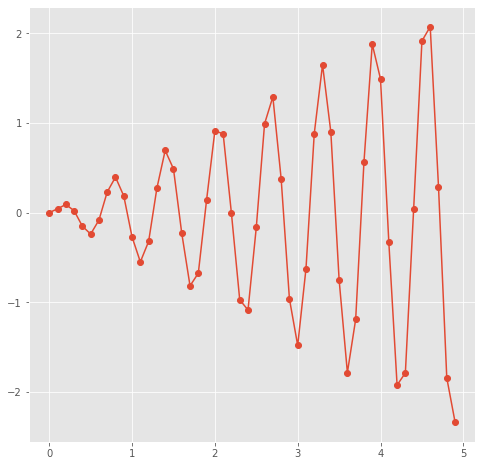

In [3]:
# complex path generation
     

# create waypoints        
cx = np.arange(0, 5, 0.1)
cy = [np.sin(ix / 0.1) * ix / 2.0 for ix in cx]

plt.plot(cx,cy,'o-')

Now let's continue to in to the `pure_pursuit_2.py` for full iplementation of the controller!